<a href="https://colab.research.google.com/github/s-choung/Research_utility/blob/main/Rh_KMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Figure 1. DFT calculations for all reaction path


In [ ]:
# Libraries
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
 
# Data set
url = 'https://python-graph-gallery.com/wp-content/uploads/mtcars.csv'
df = pd.read_csv(url)
df = df.set_index('model')
 
# Calculate the distance between each sample
Z = linkage(df, 'ward')
 
# Control number of clusters in the plot + add horizontal line.
dendrogram(Z, color_threshold=240)
plt.axhline(y=240, c='grey', lw=1, linestyle='dashed')

# Show the graph
plt.show()

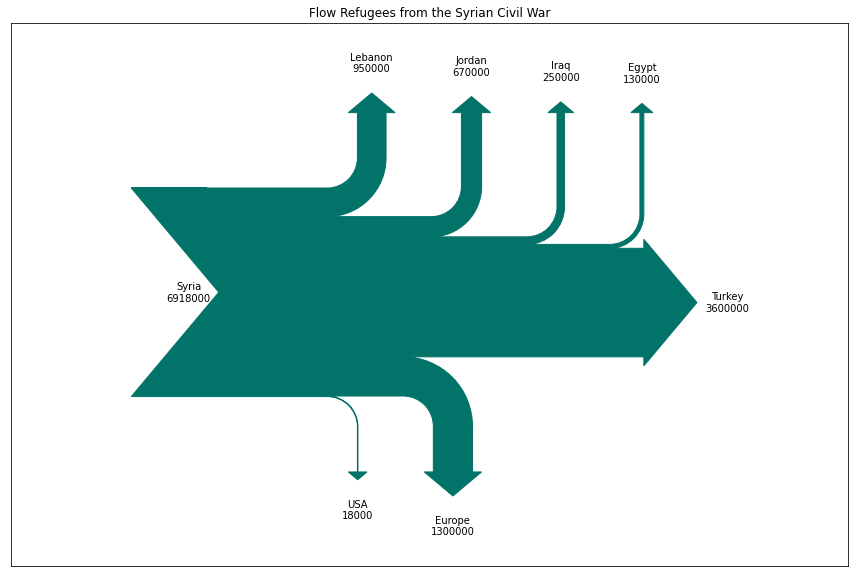

In [ ]:
from matplotlib.sankey import Sankey
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[],
                    title="Flow Refugees from the Syrian Civil War")
sankey = Sankey(ax=ax, 
                scale=0.0000001, 
                offset= 0.1,
                format = '%d')
sankey.add(flows=[6918000, -3600000, -950000, -670000, -250000, 
                  -130000, -1300000, -18000], 
           labels = ['Syria', 'Turkey', 'Lebanon', 'Jordan', 'Iraq', 
                     'Egypt', 'Europe', 'USA'], 
           orientations=[0, 0, 1, 1, 1, 1, -1, -1],#arrow directions
           edgecolor = '#027368',
           facecolor = '#027368')
sankey.finish();

In [ ]:
import plotly.graph_objects as go
import urllib, json


opacity = 0.4
# change 'magenta' to its 'rgba' value to add opacity
data['data'][0]['node']['color'] = ['rgba(255,0,255, 0.8)' if color == "magenta" else color for color in data['data'][0]['node']['color']]
data['data'][0]['link']['color'] = [data['data'][0]['node']['color'][src].replace("0.8", str(opacity))
                                    for src in data['data'][0]['link']['source']]

fig = go.Figure(data=[go.Sankey(
    valueformat = ".0f",
    valuesuffix = "TWh",
    # Define nodes
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label =  data['data'][0]['node']['label'],
      color =  data['data'][0]['node']['color']
    ),
    # Add links
    link = dict(
      source =  data['data'][0]['link']['source'],
      target =  data['data'][0]['link']['target'],
      value =  data['data'][0]['link']['value'],
      label =  data['data'][0]['link']['label'],
      color =  data['data'][0]['link']['color']
))])

fig.update_layout(title_text="Energy forecast for 2050<br>Source: Department of Energy & Climate Change, Tom Counsell via <a href='https://bost.ocks.org/mike/sankey/'>Mike Bostock</a>",
                  font_size=10)

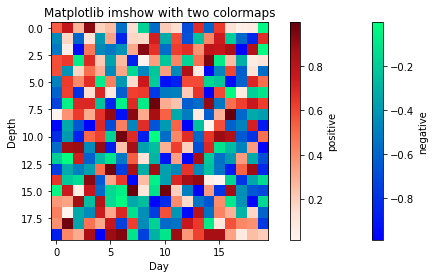

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from numpy.ma import masked_array

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

v1 = -1+2*np.random.rand(20,20)

v1a = masked_array(v1,v1<0)
v1b = masked_array(v1,v1>=0)

fig,ax = plt.subplots()

pa = ax.imshow(v1a,interpolation='nearest',cmap=cm.Reds)
pb = ax.imshow(v1b,interpolation='nearest',cmap=cm.winter)

plt.xlabel('Day')
plt.ylabel('Depth')
plt.title('Matplotlib imshow with two colormaps')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.3)
cba = plt.colorbar(pa, cax=cax)

cax = divider.append_axes("right", size="5%", pad=1.0)
cbb = plt.colorbar(pb, cax=cax)

cba.set_label('positive')
cbb.set_label('negative')

plt.savefig("matplotlib_two_colormaps.png", bbox_inches='tight')
plt.show()

In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.parallel_coordinates(df, color="species_id", labels={"species_id": "Species",
                  "sepal_width": "Sepal Width", "sepal_length": "Sepal Length",
                  "petal_width": "Petal Width", "petal_length": "Petal Length", },
                    color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=2)
fig.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["A1", "A2", "B1", "B2", "C1", "C2"],
      color = "blue"
    ),
    link = dict(
      source = [0, 1, 0, 2, 3, 3], # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = [2, 3, 3, 4, 4, 5],
      value = [8, 4, 2, 8, 4, 2]
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()

In [ ]:
import plotly.express as px
df = px.data.tips()
fig = px.parallel_categories(df, color="size", color_continuous_scale=px.colors.sequential.Inferno)
fig.show()

In [ ]:
import plotly.express as px
df = px.data.tips()
fig = px.violin(df, y="tip", x="smoker", color="sex", box=True, points="all", hover_data=df.columns)
fig.show()

In [ ]:
import pandas as pd
from collections import Counter
import json
import re
import plotly.plotly as py

raw_data = pd.read_csv('/home/StrobiHealth/PatientFlow/Raw Data/tbl_neu.csv')
bewegung = pd.read_csv('/home/StrobiHealth/PatientFlow/Raw Data/Bewegungsarten.csv')

#step 1: parse raw_data to compute Steps number for each Case and corresponding Source and Target. 
output = {1:[]}  #dictionary key is Case number (i.e. 'FallNr'), value is list of Stations tuples 
counter = 0  #counter represents number of step for each Case 
row_iterator = raw_data.iterrows()
for i, row in row_iterator: 
    if i > 0: 
        current_row = raw_data.loc[i]
        previous_row = raw_data.loc[i-1]   
        if current_row['FallNr'] == previous_row['FallNr']:    
            counter += 1      #counter incremented if previous Case number is similar 
            tup1 = (counter, previous_row['Ort'], current_row['Ort'])      #previous row = source, current row = target
            output[current_row['FallNr']].append(tup1)  
        else: 
            counter = 0      #counter reset for each new Case
            output[current_row['FallNr']] = []  
            
#step 2: aggregate tuples (i.e. (Step, Source, Target)) and compute frequency of each tuple
output_values = list(output.values())
frequency = dict(Counter(x for xs in output_values for x in set(xs)))       

#step 3: create dictionary structure with links and nodes from frequency dictionary
sankey = {"links": [], "nodes": []}
for i, y in frequency.items():     #links are created first, from items of frequency dictionary    
    if i[0] < 5: 
        link = dict(
            source = str(i[1]) + "_" + str(i[0]),
            target = str(i[2]) + "_" + str(i[0]+1),
            value = y, 
            )
        sankey["links"].append(link)     
        check_node = [link[x] for x in ['source', 'target']]     #nodes derived from links 'source' and 'target' 
        for x in check_node:        #append a new node, only if it does not already exists   
            if not any(d.get('name', None) == x for d in sankey["nodes"]): 
                name = dict(
                    name = x,
                    station = re.sub('[^a-zA-Z]+', '', x),
                    step = re.sub('[^0-9]+', '', x)
                )
                sankey["nodes"].append(name)  
                
#step 4: sort nodes (by Step number and index position in dataframe 'bewegung') and sort links by number of Steps                               
def bewegung_index(station):      #looks up index value in table 'bewegung'
    return bewegung.loc[bewegung['Bewgungsarten'] == station].index[0]               
                
sorted_nodes = sorted(sankey['nodes'], key=lambda k: (k['step'], bewegung_index(k['station']))) 
for w, node in enumerate(sorted_nodes):
    node['id'] = w
    node['color'] = 'rgba(31, 119, 180, 0.8)' 
    
def id_lookup(node, sorted_list):
    for item in sorted_list: 
        if item['name'] == node['source']:
            return item['id']
        
for d in sankey['links']: 
    d['source_id'] = id_lookup(d, sorted_nodes)    

sorted_links = sorted(sankey['links'], key=lambda k: (k['source_id']))  


#step 5: create data structure with node labels and link lists based on node index 
data = dict(
        nodes = dict(
                    label = [node['name'] for node in sorted_nodes],
                    color = [node['color'] for node in sorted_nodes]
                ),
        link = dict(
                    source = [nodes["label"].index(link['source']) for link in sorted_links ],
                    target = [nodes["label"].index(link['target']) for link in sorted_links ],
                    value = [link['value'] for link in sorted_links]
                )
            )

#step 6: plot graph with plotly
py.sign_in('xxx', 'xxxxxxx')

data_trace = dict(
    type='sankey',
    domain = dict(
      x =  [0,1],
      y =  [0,1]
    ),
    orientation = "h",
    valueformat = ".0f",
    valuesuffix = "Patients",
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(
        color = "black",
        width = 0.5
      ),
      label =  data["nodes"]["label"],
      color =  data["nodes"]["color"]
    ), 

    link = dict(
      source =  data["link"]["source"],
      target =  data["link"]["target"],
      value =  data["link"]["value"],
      label =  data["nodes"]["label"]
  )   

)

layout =  dict(
    title = "Patient Flow Analysis",
    font = dict(
      size = 10
    )
)

fig = dict(data=[data_trace], layout=layout)
py.iplot(fig, validate = False)


FileNotFoundError: ignored

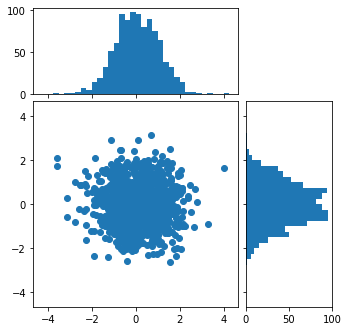

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Fixing random state for reproducibility
np.random.seed(19680801)

# the random data
x = np.random.randn(1000)
y = np.random.randn(1000)


fig, ax = plt.subplots(figsize=(5.5, 5.5))

# the scatter plot:
ax.scatter(x, y)

# Set aspect of the main axes.
ax.set_aspect(1.)

# create new axes on the right and on the top of the current axes
divider = make_axes_locatable(ax)
# below height and pad are in inches
ax_histx = divider.append_axes("top", 1.2, pad=0.1, sharex=ax)
ax_histy = divider.append_axes("right", 1.2, pad=0.1, sharey=ax)

# make some labels invisible
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histy.yaxis.set_tick_params(labelleft=False)

# now determine nice limits by hand:
binwidth = 0.25
xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
lim = (int(xymax/binwidth) + 1)*binwidth

bins = np.arange(-lim, lim + binwidth, binwidth)
ax_histx.hist(x, bins=bins)
ax_histy.hist(y, bins=bins, orientation='horizontal')

# the xaxis of ax_histx and yaxis of ax_histy are shared with ax,
# thus there is no need to manually adjust the xlim and ylim of these
# axis.

ax_histx.set_yticks([0, 50, 100])
ax_histy.set_xticks([0, 50, 100])

plt.show()